In [1]:
import numpy as np
from random import shuffle
import time
import copy
import matplotlib.pyplot as plt

In [3]:
train = np.genfromtxt('bank-note/train.csv', delimiter=",")
test = np.genfromtxt('bank-note/test.csv', delimiter=",")
train_label = (2*train[:,-1] - 1).reshape(-1,1)
test_label = (2*test[:,-1]-1).reshape(-1,1)
train[:,-1] = np.ones(train.shape[0])
test[:,-1] = np.ones(test.shape[0])

In [4]:
def learning_rate(T, gamma, d):
    return gamma/(1+ ((T + 1) * gamma/d))

In [5]:
class SVM:
    
    def __init__(self):
        self.W = None
        
    def train(self, X, y, epoch, gamma, d=1, C=0, batch_size = 1, lr = learning_rate):
        
        num_train, dim = X.shape
        self.loss_history = []
                        
        if self.W is None:
            
#             self.W = 0.001 * np.random.randn(dim, 1)
            self.W = np.zeros((dim, 1))
            
        for T in range(epoch):
            
            l_rate = lr(T, gamma, d)
            
            L = np.random.permutation(num_train)
            
#             L = np.arange(num_train)
            X_T = copy.deepcopy(X)[L, :]
            y_T = copy.deepcopy(y)[L]
            
            n_batchs = int(np.ceil(num_train/batch_size))
            
            for k in range(n_batchs):
                
                if k < n_batchs - 1:
                    X_batch_k = X_T[k*batch_size : (k+1)*batch_size , :]
                    y_batch_k = y_T[k*batch_size : (k+1)*batch_size , :]
                else:
                    X_batch_k = X_T[k*batch_size : , :]
                    y_batch_k = y_T[k*batch_size : , :]
                
                dW = self.grad(X_batch_k, y_batch_k, num_train, C )
                self.W -= l_rate * dW
                
                self.loss_history.append(self.loss(X, y, C))
                    
    
    def predict(self, X):
            
        return (np.where(X.dot(self.W) >= 0, 1, -1))
                    
                    
    def grad(self, X_btr, y_btr, num_train, C):
            
        margin = np.maximum(0, 1 - y_btr * X_btr.dot(self.W))  # batch_size x 1 matrix
        
        margin[margin > 0] = 1
        temp2 = np.ones((X_btr.shape[1], 1), dtype = int)
        temp2[-1] = 0
        
        H = ((X_btr * margin) * y_btr).sum(axis = 0).reshape(-1,1)
        grad = self.W * temp2 -  C * (num_train/X_btr.shape[0]) * H
            
        return grad  
    
    def loss(self, X, y, C):
        temp = .5 * np.dot(self.W[:-1].T, self.W[:-1]) + C * (np.maximum(0, 1 - y * (X.dot(self.W)))).sum()
        return(temp)

### (a) Use the schedule of learning rate: $\gamma_t = \frac{\gamma_0}{1+\frac{\gamma_0}{a}t}	$. Please tune $\gamma_0>0$ and $a>0$ to ensure convergence. For each setting of $C$, report your training and test error. 

C = 100/873
W =  [-0.98530879 -0.69289967 -0.77215269 -0.06311315  1.42965457]
train error = 0.011467889908256881
test error = 0.012


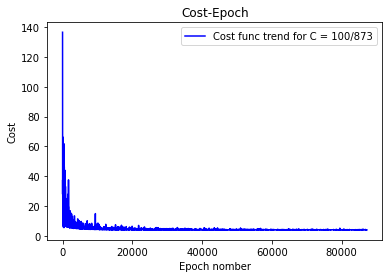

C = 500/873
W =  [-2.22528964 -1.37483814 -1.66493451 -0.24686147  2.22822299]
train error = 0.008027522935779817
test error = 0.012


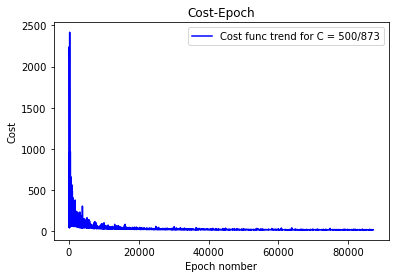

C = 700/873
W =  [-2.64387671 -1.64820974 -1.84048379 -0.29242611  2.65207245]
train error = 0.011467889908256881
test error = 0.012


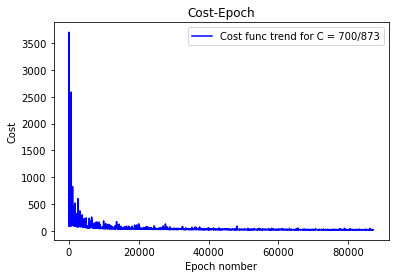

In [6]:
H1 = []
CC = ['100/873', '500/873', '700/873']
C = [100/873, 500/873, 700/873]
for i in range(3):
    print("C = {}".format(CC[i]))
    c = C[i]
    start = time.time()
    L = SVM()
    L.train(train, train_label, epoch = 100, gamma = .001 , d = .001,  batch_size = 1 , C = c)
    L.W
#     print(time.time() - start)
    print ('W = ', L.W.reshape(-1))
    H1.append(L.W.reshape(-1))
    print('train error = {}'.format(np.sum(L.predict(train) * train_label < 0)/train.shape[0]))
    print('test error = {}'.format(np.sum(L.predict(test) * test_label < 0)/test_label.shape[0]))
    A = np.array(L.loss_history).flatten()
    plt.plot(A[:], color ='blue', label = "Cost func trend for C = {}".format(CC[i]))
    #plt.plot(E_test, color ='red')
    plt.xlabel('Epoch nomber')
    plt.ylabel('Cost')
    plt.axis()
    plt.title("Cost-Epoch", color='black') 
    plt.legend()
    plt.show()

### (b) Use the schedule $\gamma_t = \frac{\gamma_0}{1+t}$. Report the training and test error for each setting of C

In [7]:
lr = lambda T, gamma, d : gamma/(1+T)

C = 100/873
W =  [-0.87804504 -0.60983139 -0.6808808  -0.04076997  1.27914409]
train error = 0.011467889908256881
test error = 0.012


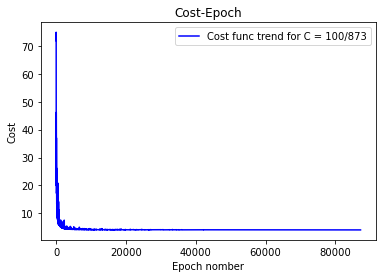

C = 500/873
W =  [-1.88359776 -1.18505151 -1.40435677 -0.20934454  1.98386163]
train error = 0.008027522935779817
test error = 0.01


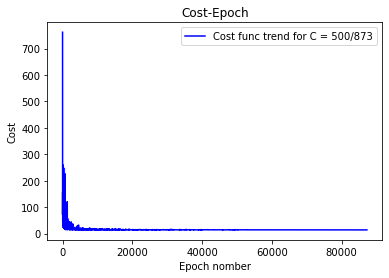

C = 700/873
W =  [-2.38601064 -1.43374891 -1.71393728 -0.2645075   2.31229378]
train error = 0.011467889908256881
test error = 0.012


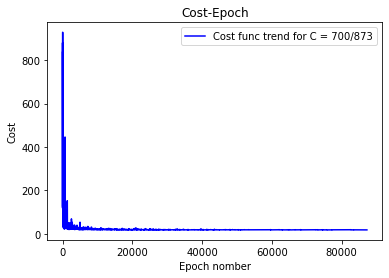

In [8]:
H2 = []
CC = ['100/873', '500/873', '700/873']
C = [100/873, 500/873, 700/873]
for i in range(3):
    print("C = {}".format(CC[i]))
    c = C[i]
#     start = time.time()
    L = SVM()
    L.train(train, train_label, epoch = 100, gamma = .0001 ,  batch_size = 1 , C = c, lr = lr)
#     L.W
#     print(time.time() - start)
    print ('W = ', L.W.reshape(-1))
    H2.append(L.W.reshape(-1))
    print('train error = {}'.format(np.sum(L.predict(train) * train_label < 0)/train.shape[0]))
    print('test error = {}'.format(np.sum(L.predict(test) * test_label < 0)/test_label.shape[0]))
    A = np.array(L.loss_history).flatten()
    plt.plot(A[:], color ='blue', label = "Cost func trend for C = {}".format(CC[i]))
    #plt.plot(E_test, color ='red')
    plt.xlabel('Epoch nomber')
    plt.ylabel('Cost')
    plt.axis()
    plt.title("Cost-Epoch", color='black') 
    plt.legend()
    plt.show()

### (c) For each $C$, report the differences between the model parameters learned from the two learning rate schedules, as well as the differences between the training/test errors. What can you conclude? 

In [9]:
for i in range(len(H1)):
    print(np.linalg.norm(H1[i]-H2[i]))

0.2233585202314431
0.5308418360325643
0.49470331623021485
